# Аналитика в авиакомпании

 авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день.Необходимо понять предпочтения пользователей, покупающих билеты на те или иные направления.

###  Открытие файла с данными. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_flight = pd.read_csv('/datasets/query_1.csv', sep=',')
city_flight = pd.read_csv('/datasets/query_3.csv', sep=',')

In [3]:
model_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


/datasets/query_1.csv — результат первого запроса. 
В нём содержится информация о:
- model — модели самолета- тип данных object-корректно
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года-тип данных целочисленный.

Изучая таблицу можно отметить что типы данных корректны, пропуски отсутствуют

In [4]:
city_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:

city — городах, тип данных object
average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года- тип данных целочисленный
Изучая таблицу можно отметить что типы данных корректны, пропуски отсутствуют

### Выберем топ-10 городов по количеству рейсов

In [5]:
df_city = city_flight.sort_values(by='average_flights', ascending=False).reset_index(drop=True).head(10)


Колличество вылетов по городам зависит от нескольких факторов, в том числе и от колличества жителей в городе и его удаленности от федерального центра и пересадочного узла- Москвы. Именно поэтому в г.Москва самое большое колличество рейсов. Следом идут города с высоким колличеством жителей и находящиеся на удаленности от пересадочного узла. Появление города Ульяновск в данной выборке обусловлено скорее всего отсутствием быстрой альтернативы авиационному транспорту.


### Изучим модели самолетов и количество рейсов совершаемых ими

In [6]:
df_model = model_flight.sort_values(by='flights_amount', ascending=False).reset_index(drop=True)


Рассмотрим схематично нашу таблицу

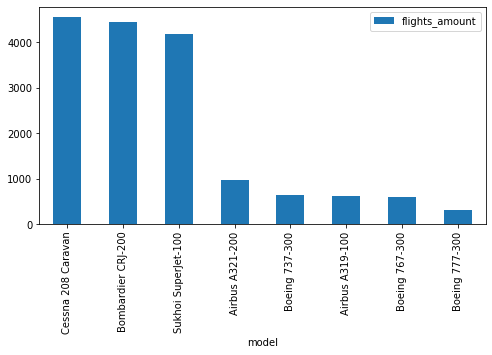

In [7]:
df_model.plot(x='model', y='flights_amount', kind = 'bar',  figsize=(8, 4))

Частота полетов отдельных марок самолетов зависит от их вместительности и соответственно грузоподъемности. Более грузоподъемные и дальнемагистральные самолеты делают меньше вылетов по колличеству, но их продолжительность однозначно больше.Поэтому маловместительные самолеты делают больше вылетов, но время нахождения в воздухе также меньше.

Построим график топ-10 городов по колличеству рейсов

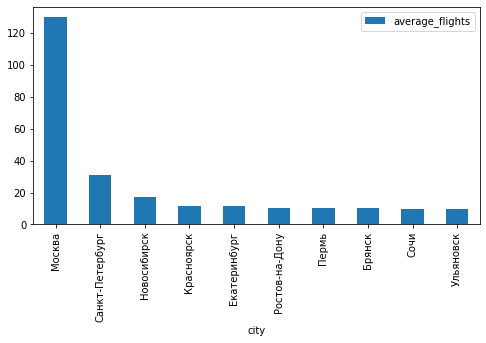

In [53]:
df_city.plot(x='city', y='average_flights', kind = 'bar', figsize=(8, 4))

Огромное открытие- почти одиноковое колличество рейсов Сочи и Ульяновск! Сочи-горы и море, Ульяновск-просто ульяновск...

### Рассмотрим города и количество рейсов в них

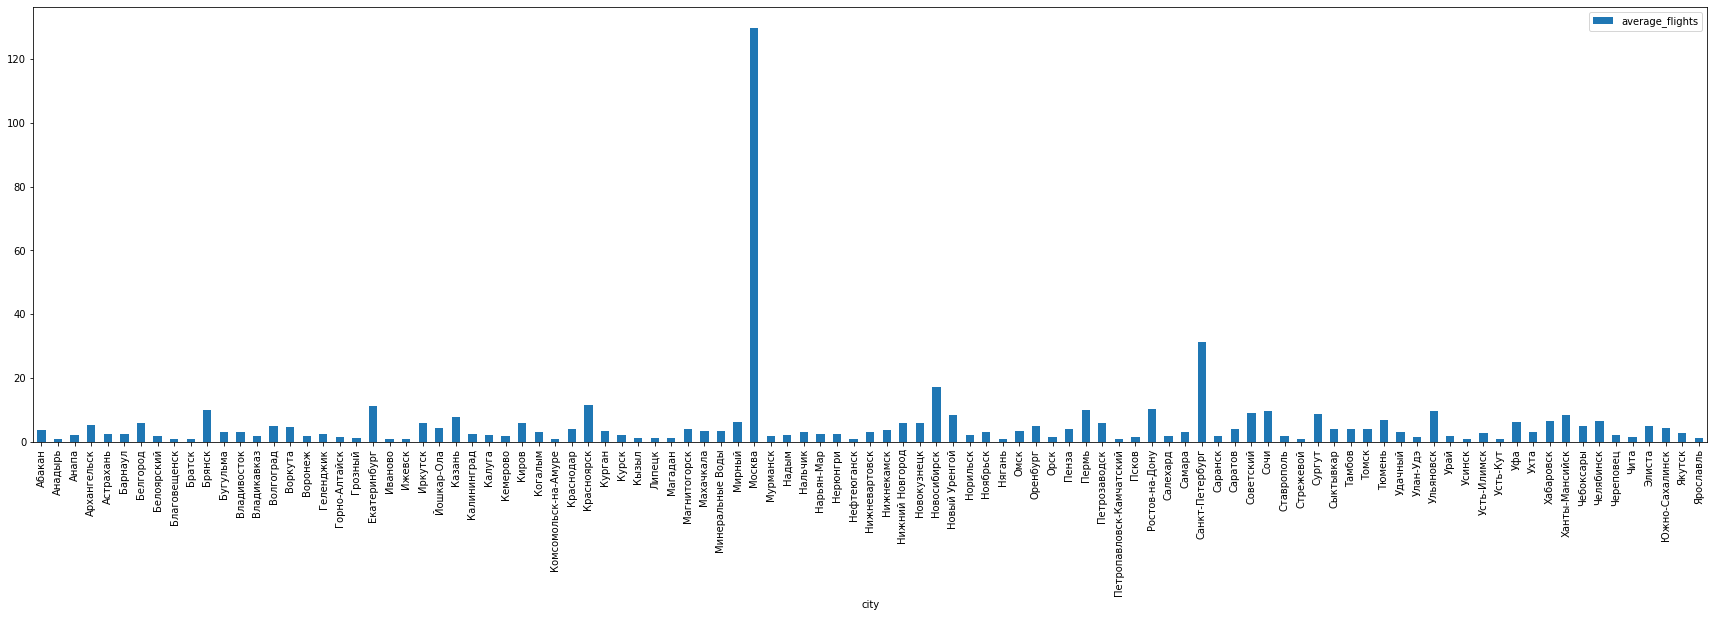

In [59]:
city_flight.plot(x='city', y='average_flights', kind = 'bar',  figsize=(30, 8))

По графику видно что колличества вылетов по городам - первые три города являются самыми большими по колличеству жителей и транспортным хабам-это Москва, втрое меньше Санкт Петербург и далее Новосибирск. По остальным городам нашей страны колличество жителей определяет колличество вылетов, но только в том случае если до транспортного хаба в г.Москва, где находится 4 аэропорта, можно добраться более удобным и привычным способом.

### Общий вывод

Самолет – самый безопасный вид транспорта! А также самый быстрый! В России самые часто используемые воздушные судна-Cessna 208 Caravan, Bombardier CRJ-200. Вероятнее всего именно эти борта перевозят людей не в огромных мегаполисах до пункта назначения,а используются для соединения небольших городов и дальних поселков в глуби России-например Якутия и Дальний восток. Они малогабаритны и преодолевают малые расстояния где нет автомобильных дорог и ЖД переездов.

Несомненным лидером среди городов является Москва как центр авиасообщения. Во-первых, многие жители других городов России улетающие зарубеж- вынуждены лететь с пересадками в узле Москвы. Во-вторых-колличество жителей а также туристов прибывающих посмотреть на нашу столицу кратно больше.

По остальным городам России можно сказать, что авиатранспортом конечно же пользуются, по мере развитости авиапотока в том или ином городе, но также используют альтернативные способы-авто и ЖД.

Если рассматривать с точки зрения гипотезы, что количество рейсов во время фестивалей увеличивается, то здесь можно предположить что именно фестивали мало влияют на общий пассажиропоток.
